# Using python for exploratory data analysis 



## DATASET DESCRIPTION

In this dataset you can find information on sexual crimes from January 1st ,2010 to May 31th, 2021.

**Source:** DIJIN - National Police. Data extracted on June 14, 2021 at 18:00 hours.

**URL:**  https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delitos-sexuales-Polic-a-Nacional/fpe5-yrmw

### Variables 

- **DEPARTAMENTO=** Department/State where crime took place.
- **MUNICIPIO=** City/Municipality where crime took place.
- **CODIGO.DANE=** City/Municipality ID in DANE(National Administrative Department of Statistics, Spanish: Departamento Administrativo Nacional de Estadística)
- **ARMAS.MEDIOS=** Weapon used.
- **FECHA.HECHO=** Date of report.
- **GENERO=** Gender.
- **GRUPO.ETARIO=** Age group.
- **CANTIDAD=** Amount of criminals involved.
- **DELITO=** Official crime category by law.



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
import seaborn as sns


crime_data = pd.read_csv("~\Documents\DOCS\Ciencia de datos - Proyectos\Portfolio\Colombia-Sex-Crimes\Exploratory Data Analysis/database.csv") # importing the database

A look up into the dataset, there are 11 columns containing the information of the place where the crime look place and basic info about the victim that would help to explore de data and what it has to say about the crime rate in each geographical division within the country as well as the gender/age group that it's the most affected. 



In [20]:
crime_data

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,CANTIDAD,DELITO,ARTICULO - DELITO,MUNICIPIO-CODIGO DANE
0,ANTIOQUIA,SONSON,5756000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,SONSON- ID[5756000]
1,META,PUERTO GAITÁN,50568000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,PUERTO GAITÁN- ID[50568000]
2,VALLE,BUENAVENTURA,76109000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,BUENAVENTURA- ID[76109000]
3,CESAR,BOSCONIA,20060000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ARTÍCULO 205,BOSCONIA- ID[20060000]
4,CAUCA,POPAYÁN (CT),19001000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,MASCULINO,ADULTOS,1,ARTÍCULO 210 A. ACOSO SEXUAL,ARTÍCULO 210 A,POPAYÁN (CT)- ID[19001000]
...,...,...,...,...,...,...,...,...,...,...,...
236467,ANTIOQUIA,MUTATÁ,5480000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,MUTATÁ- ID[5480000]
236468,SUCRE,SINCELEJO (CT),70001000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,ADULTOS,1,ARTÍCULO 205. ACCESO CARNAL VIOLENTO,ARTÍCULO 205,SINCELEJO (CT)- ID[70001000]
236469,VALLE,CANDELARIA,76130000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,ADOLESCENTES,1,ARTÍCULO 208. ACCESO CARNAL ABUSIVO CON MENOR ...,ARTÍCULO 208,CANDELARIA- ID[76130000]
236470,SANTANDER,GIRÓN,68307000.0,SIN EMPLEO DE ARMAS,2016-05-19 00:00:00,FEMENINO,MENORES,1,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,GIRÓN- ID[68307000]


In [14]:
crime_data.describe(include=object)

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,DELITO,ARTICULO - DELITO,MUNICIPIO-CODIGO DANE
count,236472,236471,236472,236472,236472,236472,236472,236472,236472
unique,32,1022,9,4169,3,4,23,17,1103
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),SIN EMPLEO DE ARMAS,2018-01-01 00:00:00,FEMENINO,MENORES,ARTÍCULO 209. ACTOS SEXUALES CON MENOR DE 14 AÑOS,ARTÍCULO 209,BOGOTÁ D.C. (CT)- ID[11001000]
freq,43273,32291,106030,407,202459,121768,80813,80813,32291


Some columns' type will be changed to 'category', 'int' and 'datetime' as seen convenient


In [21]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236472 entries, 0 to 236471
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DEPARTAMENTO           236472 non-null  object 
 1   MUNICIPIO              236471 non-null  object 
 2   CODIGO DANE            236471 non-null  float64
 3   ARMAS MEDIOS           236472 non-null  object 
 4   FECHA HECHO            236472 non-null  object 
 5   GENERO                 236472 non-null  object 
 6   GRUPO ETARIO           236472 non-null  object 
 7   CANTIDAD               236472 non-null  int64  
 8   DELITO                 236472 non-null  object 
 9   ARTICULO - DELITO      236472 non-null  object 
 10  MUNICIPIO-CODIGO DANE  236472 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 19.8+ MB


##  DATA PREPARATION

In [11]:
#Names are going to be simplified. Also there are 2 missing values which are too low to be significant if dropped from the database which has 236472  entries.

crime_data.rename(columns={"FECHA HECHO":"FECHA","ARMAS MEDIOS":"ARMA"}, inplace=True)
crime_data.isnull().sum() 

DEPARTAMENTO             0
MUNICIPIO                1
CODIGO DANE              1
ARMA                     0
FECHA                    0
GENERO                   0
GRUPO ETARIO             0
CANTIDAD                 0
DELITO                   0
ARTICULO - DELITO        0
MUNICIPIO-CODIGO DANE    0
dtype: int64

In [15]:
crime_data=crime_data.dropna()

In [21]:
#All Colombia's departments names are in the dataset without any misspelled duplicate.

set(crime_data["DEPARTAMENTO"]) 

{'AMAZONAS',
 'ANTIOQUIA',
 'ARAUCA',
 'ATLÁNTICO',
 'BOLÍVAR',
 'BOYACÁ',
 'CALDAS',
 'CAQUETÁ',
 'CASANARE',
 'CAUCA',
 'CESAR',
 'CHOCÓ',
 'CUNDINAMARCA',
 'CÓRDOBA',
 'GUAINÍA',
 'GUAJIRA',
 'GUAVIARE',
 'HUILA',
 'MAGDALENA',
 'META',
 'NARIÑO',
 'NORTE DE SANTANDER',
 'PUTUMAYO',
 'QUINDÍO',
 'RISARALDA',
 'SAN ANDRÉS',
 'SANTANDER',
 'SUCRE',
 'TOLIMA',
 'VALLE',
 'VAUPÉS',
 'VICHADA'}

In [13]:
# Changing columns to category type
columns=["DEPARTAMENTO","MUNICIPIO","GENERO","GRUPO ETARIO",
         "DELITO","ARMA","CANTIDAD","ARTICULO - DELITO","MUNICIPIO-CODIGO DANE"]
for i in columns:
    crime_data[i]=crime_data[i].astype("category")
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236472 entries, 0 to 236471
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   DEPARTAMENTO           236472 non-null  category
 1   MUNICIPIO              236471 non-null  category
 2   CODIGO DANE            236471 non-null  float64 
 3   ARMA                   236472 non-null  category
 4   FECHA                  236472 non-null  object  
 5   GENERO                 236472 non-null  category
 6   GRUPO ETARIO           236472 non-null  category
 7   CANTIDAD               236472 non-null  category
 8   DELITO                 236472 non-null  category
 9   ARTICULO - DELITO      236472 non-null  category
 10  MUNICIPIO-CODIGO DANE  236472 non-null  category
dtypes: category(9), float64(1), object(1)
memory usage: 6.2+ MB


In [18]:
#CODIGO DANE should be a factor as it is an ID assigned for each city/municipality. Before hand it will be converted to INT so remove its decimals 
crime_data["CODIGO DANE"]=crime_data["CODIGO DANE"].astype(int).astype("category") 
crime_data["CODIGO DANE"].head(5)

0     5756000
1    50568000
2    76109000
3    20060000
4    19001000
Name: CODIGO DANE, dtype: category
Categories (1102, int64): [5001000, 5002000, 5004000, 5021000, ..., 99001000, 99524000, 99624000, 99773000]

In [20]:
#FECHA is changed from factor to date class 
crime_data["FECHA"]=pd.to_datetime(crime_data["FECHA"])

In [22]:
# CANTIDAD has an outlier with a number too high that has to be removed as it's likely a mistype.
crime_data["CANTIDAD"].value_counts()
crime_data=crime_data[crime_data["CANTIDAD"]!=86]

## EDA - EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'Crime reports distribution by department and gender')

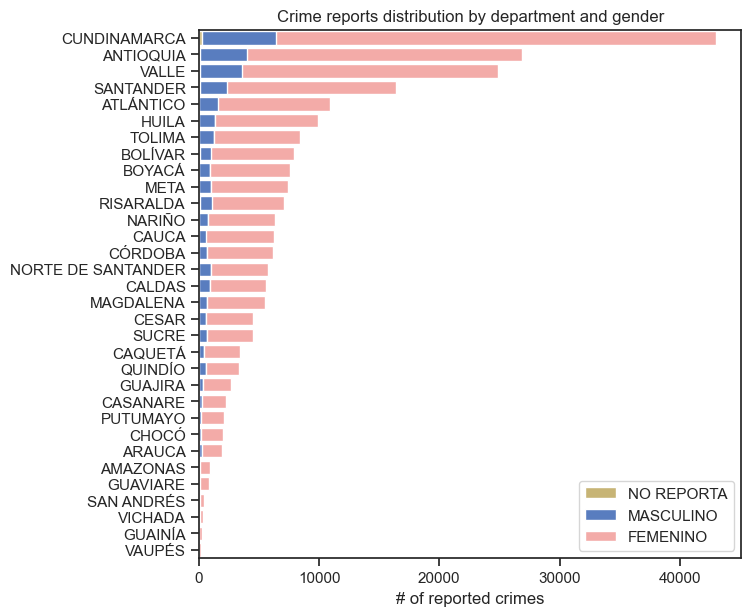

In [28]:
#DEPARTAMENTO

crime_by_department=crime_data.groupby(['DEPARTAMENTO','GENERO'])['GENERO'].count().unstack()
crime_by_department=crime_by_department.fillna(0)

#Now create a new column with the total of reports by each department
crime_by_department['TOTAL']=crime_by_department['FEMENINO']+crime_by_department['MASCULINO']+crime_by_department['NO REPORTA']
crime_by_department=crime_by_department.sort_values('TOTAL',ascending=False) # Sort TOTAL in decreasing order

# Horizontal bar graph showing the distribution of crimes by department and gender
sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7,7),dpi=100)
sns.set_color_codes("muted")
sns.barplot(x="NO REPORTA",y=crime_by_department.index.values,
            data=crime_by_department,color='y',label='NO REPORTA',
            order=crime_by_department.index.values)
sns.barplot(x="MASCULINO",y=crime_by_department.index.values,
            data=crime_by_department,color='b',
            left=crime_by_department['NO REPORTA'],label='MASCULINO',
            order=crime_by_department.index.values)
sns.set_color_codes("pastel")
sns.barplot(x="FEMENINO",y=crime_by_department.index.values,
            data=crime_by_department,color='r',
            left=crime_by_department['MASCULINO'],label='FEMENINO',
            order=crime_by_department.index.values)
ax.legend(loc='lower right')
ax.set_xlabel("# of reported crimes")
ax.set_title("Crime reports distribution by department and gender")


Now a new graph is made to see the crime reports per 1000 inhabitants but first the data of each Department is needed.

Inhabitants by department, Census year 2018.

Source: https://sitios.dane.gov.co/cnpv/#!/

In [29]:
aux_department=["CUNDINAMARCA","ANTIOQUIA","VALLE","SANTANDER","ATLÁNTICO",
                "HUILA","TOLIMA","RISARALDA","BOLÍVAR","META",
                "NORTE DE SANTANDER","BOYACÁ","CALDAS","NARIÑO","MAGDALENA",
                "CÓRDOBA","SUCRE","CAUCA","CESAR","QUINDÍO","CAQUETÁ",
                "GUAJIRA","CASANARE","ARAUCA","PUTUMAYO","CHOCÓ","GUAVIARE",
                "AMAZONAS","SAN ANDRÉS","VICHADA","VAUPÉS","GUAINÍA"]
aux_inhabitant=[9974346,5974788,3789874,2008841,2342265,1009548,1228763,839597,
                1909460,919129,1346806,1135698,923472,1335521,1263788,1555596,
                864036,1243503,1098577,509640,359602,825364,379892,239503,
                283197,457412,73081,66056,48299,76642,37690,44431]
aux_male_rate=[48.2,48.3,47.5,49,48.7,49.9,49.6,47.9,49.6,50.6,49.3,49.2,48.5,
               49,50,49.8,50.3,49.5,49.5,48.2,50.7,49,50.5,50.5,50.5,49.4,53.5,
               52.1,48.3,53.1,52.5,52.3]
aux_female_rate=[51.8,51.7,52.5,51,51.3,50.1,50.4,52.1,50.4,49.4,50.7,50.8,
                 51.5,51,50,50.2,49.7,50.5,50.5,51.8,49.3,51,49.5,49.5,49.5,
                 50.6,46.5,47.9,51.7,46.9,47.5,47.8]
data=list(zip(aux_department,aux_inhabitant,aux_male_rate,aux_female_rate))
inhabitants_by_department=pd.DataFrame(data,
                                       columns=['DEPARTMENT','INHABITANTS',
                                                'MALE RATE','FEMALE RATE'],
                                       index=aux_department)

Text(0.5, 1.0, 'Crime reports distribution by department per 1000 inhabitants')

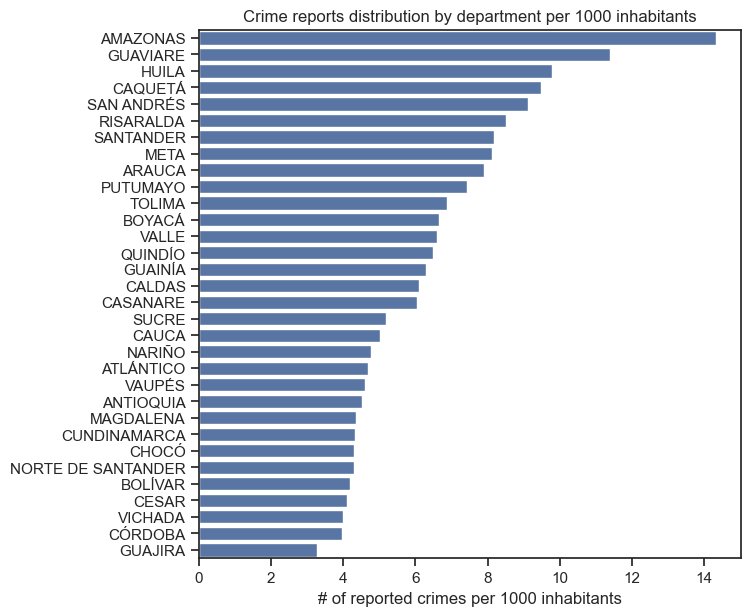

In [31]:
# Crime rate by 1.000 inhabitants

total_crime_per1000= pd.DataFrame(crime_by_department['TOTAL']/(inhabitants_by_department['INHABITANTS'])*1000,columns=['TOTAL']).sort_values('TOTAL',ascending=False)
sns.set_theme(style="ticks")
fig,ax = plt.subplots(figsize=(7,7),dpi=100)
sns.barplot(x="TOTAL",y=total_crime_per1000.index.values,data=total_crime_per1000,color='b')
ax.set_xlabel("# of reported crimes per 1000 inhabitants")
ax.set_title("Crime reports distribution by department per 1000 inhabitants")
